In [19]:
# Render graphics right into notebook
%pylab inline

import pandas  as pd
import seaborn as sb

from pylab import rcParams


rcParams['figure.figsize'] = 8, 5

Populating the interactive namespace from numpy and matplotlib


In [20]:
# Load the data
df = pd.read_csv('data/video_games.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [22]:
df.shape

(16719, 16)

In [23]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Drop NaNs
df = df.dropna()
df.shape

(6825, 16)

In [25]:
# Interesting columns
cols = ['Name', 'Platform', 'Year_of_Release', 'Genre',
        'Global_Sales', 'Critic_Score', 'Critic_Count',
        'User_Score', 'User_Count', 'Rating']

df[cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,29.80,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,28.92,58.0,41.0,6.6,129.0,E


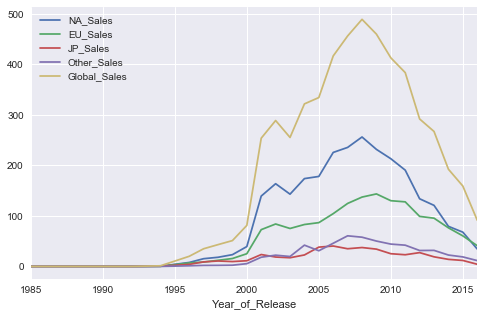

In [26]:
# Filter rows with Sales, sum them up, plot
sales = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales.groupby('Year_of_Release').sum().plot()

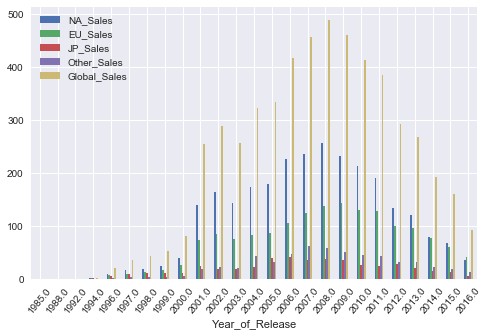

In [27]:
sales.groupby('Year_of_Release').sum().plot(kind='bar', rot=50)

## Seaborn

---

Seaborn is an abstraction over `matplotlib` which helps to create more sophisticated charts.

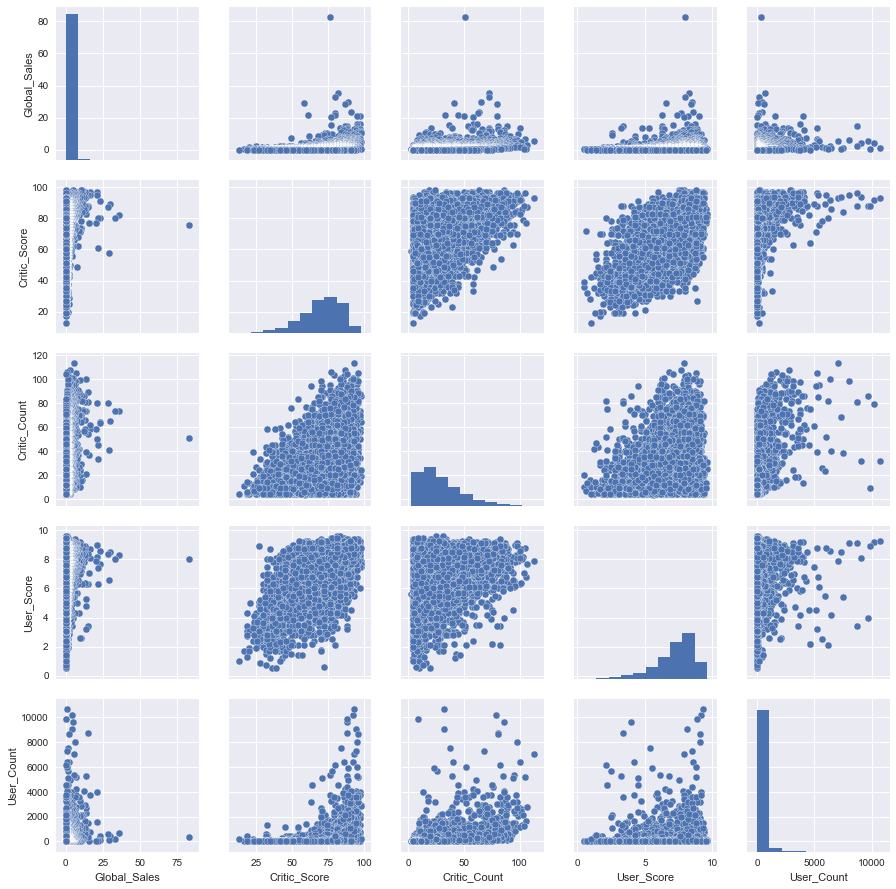

In [33]:
# Fix datatype
df['User_Score'] = pd.to_numeric(df['User_Score'])

# Scatter plot matrix (pairplot)
plot_cols = ['Global_Sales', 'Critic_Score', 'Critic_Count',
        'User_Score', 'User_Count']

sb_plot = sb.pairplot(df[plot_cols])
sb_plot.savefig('pariplot.png')